In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [5]:
df=pd.read_csv("DataCoSupplyChainDataset.csv",encoding="latin-1")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1.0,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1.0,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1.0,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1.0,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1.0,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/15/2018 11:24,Standard Class


In [6]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status',
       'shipping d

In [16]:
data=df.copy()
FeatureList=['Type', 'Benefit per order', 'Sales per customer', 
          'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 
           'Customer Id', 'Customer Segment', 
          'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude',
          'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 
          'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 
          'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 
          'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id',
          'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode']

df1=df[FeatureList]
df1.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,725.0,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1.0,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,2/3/2018 22:56,Standard Class
1,TRANSFER,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,725.0,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1.0,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/18/2018 12:27,Standard Class
2,CASH,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,95125.0,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1.0,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/17/2018 12:06,Standard Class
3,DEBIT,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,90027.0,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1.0,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/16/2018 11:45,Standard Class
4,PAYMENT,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,725.0,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1.0,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/15/2018 11:24,Standard Class


Delivery Status

In [17]:
data_delivery_status=df1.groupby(['Delivery Status'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(x=data_delivery_status['Delivery Status'] , y=data_delivery_status['Number of Orders']  , color=data_delivery_status['Number of Orders'],
      labels = { 'Delivery Status': 'Delivery Status', 'Number of Orders': 'Number of Orders'})

In [19]:
data_delivery_status_region=df1.groupby(['Delivery Status', 'Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(data_delivery_status_region, x='Delivery Status', y='Number of Orders'  , color='Order Region',
      )
df1['Customer_ID_STR']=df1['Customer Id'].astype(str)

data_customers=df1.groupby(['Customer_ID_STR'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(data_customers.head(20),x='Number of Orders', y='Customer_ID_STR' , color='Number of Orders'      )

<ipython-input-19-9f4f7081e1d9>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
df1['Customer_ID_STR']=df1['Customer Id'].astype(str)

data_customers_profit=df1.groupby(['Customer_ID_STR'])['Order Profit Per Order'].sum().reset_index(name='Profit of Orders').sort_values(by= 'Profit of Orders', ascending= False)
px.bar(data_customers_profit.head(20),x='Profit of Orders', y='Customer_ID_STR' , color='Profit of Orders'      )

<ipython-input-20-94ad08f0c3c5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
data_Customer_Segment=df1.groupby(['Customer Segment'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.pie(data_Customer_Segment, values='Number of Orders', names= 'Customer Segment' , title= 'Number of Orders of different Customer Segments', 
       width=600 , height=600 , color_discrete_sequence = px.colors.sequential.RdBu)

In [22]:
data_Category_Name=df1.groupby(['Category Name'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= True)
px.bar(data_Category_Name, x='Number of Orders',y = 'Category Name',color ='Number of Orders')

In [23]:
data_Region=df1.groupby(['Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= True)
px.bar(data_Region, x='Number of Orders',y = 'Order Region',color ='Number of Orders')

In [24]:
data_countries=df1.groupby(['Order Country'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= True)
px.bar(data_countries.head(20), x='Number of Orders',y = 'Order Country',color ='Number of Orders')

In [25]:
df_geo=df1.groupby([ 'Order Country', 'Order City'])['Order Profit Per Order'].sum().reset_index(name='Profit of Orders').sort_values(by= 'Profit of Orders', ascending= False)

df_geo

,Order Country,Order City,Profit of Orders
2790,República Dominicana,Santo Domingo,15647.599972
2692,Reino Unido,London,9844.049921
1422,Filipinas,Manila,9457.599980
2419,Nicaragua,Managua,9237.230025
1252,Estados Unidos,New York City,9044.629958
...,...,...,...
638,China,Dalian,-1761.389995
1813,Honduras,Choloma,-1970.199999
121,Alemania,Schwerin,-2132.719999
2681,Reino Unido,Kettering,-2275.250000


In [26]:
fig = px.choropleth(df_geo ,  locationmode='country names', locations='Order Country',
                    color='Profit of Orders', # lifeExp is a column of data
                    hover_name='Order Country', 
                    #hover_data ='Order City',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

In [27]:
df_sales_country=df1.groupby([ 'Order Country'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_country.head(10), x='Sales of Orders',y = 'Order Country',color ='Sales of Orders')

In [28]:
df_sales_country=df1.groupby([ 'Order Country'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_country.head(10), x='Sales of Orders',y = 'Order Country',color ='Sales of Orders')

In [29]:
df_sales_country=df1.groupby([ 'Product Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_country.head(10), x='Sales of Orders',y = 'Product Name',color ='Sales of Orders')

In [30]:
df_sales_pd=df1.groupby([ 'Product Name', 'Delivery Status'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_pd.head(10), x='Sales of Orders',y = 'Product Name',color ='Delivery Status')

In [31]:
df_sales_pr=df1.groupby([ 'Product Name', 'Order Region'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_pr.head(10), x='Sales of Orders',y = 'Product Name',color ='Order Region')

In [32]:
df_sales_pr=df1.groupby([  'Category Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_pr.head(10), x='Sales of Orders',y = 'Category Name',color ='Sales of Orders')

In [33]:
df_sales_pr=df1.groupby([ 'Type'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_pr.head(10), x='Sales of Orders',y = 'Type',color ='Sales of Orders')

In [34]:
df_sales_tp=df1.groupby([ 'Type', 'Product Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_tp.head(10), x='Sales of Orders',y = 'Type',color ='Product Name')

In [35]:
import datetime as dt

data_orderdate=df[['order date (DateOrders)', 'Sales']]
data_orderdate['order_date'] = pd.to_datetime(data_orderdate['order date (DateOrders)'])

<ipython-input-35-ebd23e881018>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
data_orderdate["Quarter"] = data_orderdate['order_date'].dt.quarter
data_orderdate["Month"] = data_orderdate['order_date'].dt.month
data_orderdate["year"] = data_orderdate['order_date'].dt.year

<ipython-input-36-760df835511f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-36-760df835511f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-36-760df835511f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
data_orderdate['YearStr']=data_orderdate['year'].astype(str)
df_sales_year=data_orderdate.groupby([ 'YearStr'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_year, x='Sales of Orders',y = 'YearStr',color ='Sales of Orders')

<ipython-input-37-4f646897a834>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
data_orderdate['QuarterStr']=data_orderdate['Quarter'].astype(str)
df_sales_quarter=data_orderdate.groupby([ 'YearStr','QuarterStr'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_quarter, x='Sales of Orders',y = 'QuarterStr',color ='YearStr')

<ipython-input-38-5a6952a234b8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
data_orderdate['MonthStr']=data_orderdate['Month'].astype(str)
df_sales_m=data_orderdate.groupby([ 'QuarterStr', 'MonthStr'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_m, x='Sales of Orders',y = 'QuarterStr',color ='MonthStr')

<ipython-input-39-8d8bf970e5c0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
data=df1.copy()
data['SUSPECTED_FRAUD'] = np.where(data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x
features=data.drop(columns=['SUSPECTED_FRAUD','Order Status' ])
target=data['SUSPECTED_FRAUD']
features.isnull().sum()

Type                              0
Benefit per order                 0
Sales per customer                0
Delivery Status                   0
Late_delivery_risk                0
Category Name                     0
Customer City                     0
Customer Country                  0
Customer Id                       0
Customer Segment                  0
Customer State                    0
Customer Zipcode                  1
Department Name                   0
Latitude                          0
Longitude                         0
Market                            0
Order City                        0
Order Country                     0
Order Customer Id                 0
order date (DateOrders)           0
Order Id                          0
Order Item Cardprod Id            0
Order Item Discount               0
Order Item Discount Rate          0
Order Item Id                     0
Order Item Product Price          0
Order Item Profit Ratio           1
Order Item Quantity         

In [42]:
features=features.apply(Labelencoder_feature)
features.head()
data1=pd.concat([features,target],axis=1)

In [43]:
corr = data1.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = data1.columns[columns]
selected_columns

Index(['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Quantity', 'Order Region', 'Order State', 'Order Zipcode', 'Product Description', 'Product Image', 'Product Status', 'Shipping Mode', 'Customer_ID_STR', 'SUSPECTED_FRAUD'], dtype='object')

In [44]:
features1=features[['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 
                    'Category Name', 'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment', 
                    'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude', 'Market', 
                    'Order City', 'Order Country', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
                    'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Quantity',
                    'Order Region', 'Order State', 'Order Zipcode', 'Product Description', 'Product Image', 
                    'Product Status', 'Shipping Mode', 'Customer_ID_STR']]
from scipy.stats import pearsonr

corre=pd.DataFrame()

for i in features1.columns:
    corre[i]= pearsonr(target, features1[i])
    
    
corre

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Quantity,Order Region,Order State,Order Zipcode,Product Description,Product Image,Product Status,Shipping Mode,Customer_ID_STR
0,0.197594,0.008354,0.017594,1.012086e-01,-1.343819e-01,0.001731,-0.014156,0.014717,-0.003683,5.709050e-02,0.012782,-0.013894,2.865752e-02,-0.011359,0.013716,0.013922,-0.005339,-0.010774,0.010456,-0.000769,-0.023874,0.015878,0.005422,-3.807621e-02,6.653729e-02,0.007565,-0.007586,-0.008820,NaN,3.100085e-02,-0.000567,4.633630e-02,0.004516
1,0.000000,0.088187,0.000330,2.915636e-95,4.388455e-167,0.723866,0.003864,0.002668,0.452303,2.021356e-31,0.009090,0.004572,4.922872e-09,0.020436,0.005121,0.004491,0.275865,0.027888,0.032847,0.875357,0.000001,0.001193,0.268467,7.629555e-15,4.328957e-42,0.122608,0.121564,0.071866,NaN,2.478540e-10,0.907911,3.032542e-21,0.356763


In [45]:
corre1=corre.T
coore2= corre1.iloc[:,0].sort_values(ascending=False)
coore2

Type                        0.197594
Delivery Status             0.101209
Order Item Quantity         0.066537
Customer Segment            0.057091
Shipping Mode               0.046336
Product Image               0.031001
Department Name             0.028658
Sales per customer          0.017594
Order Item Discount         0.015878
Customer Country            0.014717
Market                      0.013922
Longitude                   0.013716
Customer State              0.012782
order date (DateOrders)     0.010456
Benefit per order           0.008354
Order Region                0.007565
Order Item Discount Rate    0.005422
Customer_ID_STR             0.004516
Category Name               0.001731
Product Status             -0.000567
Order Id                   -0.000769
Customer Id                -0.003683
Order City                 -0.005339
Order State                -0.007586
Order Zipcode              -0.008820
Order Country              -0.010774
Latitude                   -0.011359
C

In [46]:
coore2.index
new_features= ['Type', 'Delivery Status', 'Order Region', 'Customer Country', 'Customer State', 'Order Zipcode',
               'Shipping Mode', 'Order Country', 'Customer Zipcode', 'Order City', 'Customer Segment', 'Order State',
               'Late_delivery_risk', 'Product Description', 'Product Status']

In [47]:
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features, target)

In [48]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value'])
f_reg_results.P_Value= f_reg_results.P_Value.astype(float)
f_reg_results=f_reg_results[f_reg_results.P_Value<0.06]
f_reg_results

,Variable,F_Value,P_Value
0,Type,1692.259953,0.000
39,Product Price,60.817669,0.000
38,Product Name,40.067301,0.000
37,Product Image,40.067301,0.000
35,Product Category Id,18.237588,0.000
34,Product Card Id,23.756447,0.000
29,Order Item Total,12.893390,0.000
28,Sales,12.979521,0.000
27,Order Item Quantity,185.217754,0.000
25,Order Item Product Price,60.473204,0.000


In [49]:
f_reg_list=f_reg_results.Variable.values
f_reg_list

array(['Type', 'Product Price', 'Product Name', 'Product Image',
       'Product Category Id', 'Product Card Id', 'Order Item Total',
       'Sales', 'Order Item Quantity', 'Order Item Product Price',
       'Shipping Mode', 'Department Name', 'Order Item Cardprod Id',
       'Sales per customer', 'Delivery Status', 'Late_delivery_risk',
       'Customer Segment', 'Order Item Discount', 'Customer Country',
       'Market', 'Customer City', 'Longitude', 'Customer Zipcode',
       'Customer State', 'Latitude', 'Order Country',
       'order date (DateOrders)'], dtype=object)

In [51]:
final_features=features[['Type', 'Order Region', 'Delivery Status', 'Late_delivery_risk',
       'Customer Country', 'Order State', 'Order City',
       'Customer Segment', 'Customer State', 'Customer Zipcode',
       'Order Country', 'Order Zipcode', 'shipping date (DateOrders)',
       'Shipping Mode']]
final_data=pd.concat([final_features, target], axis=1)

<Axes: >

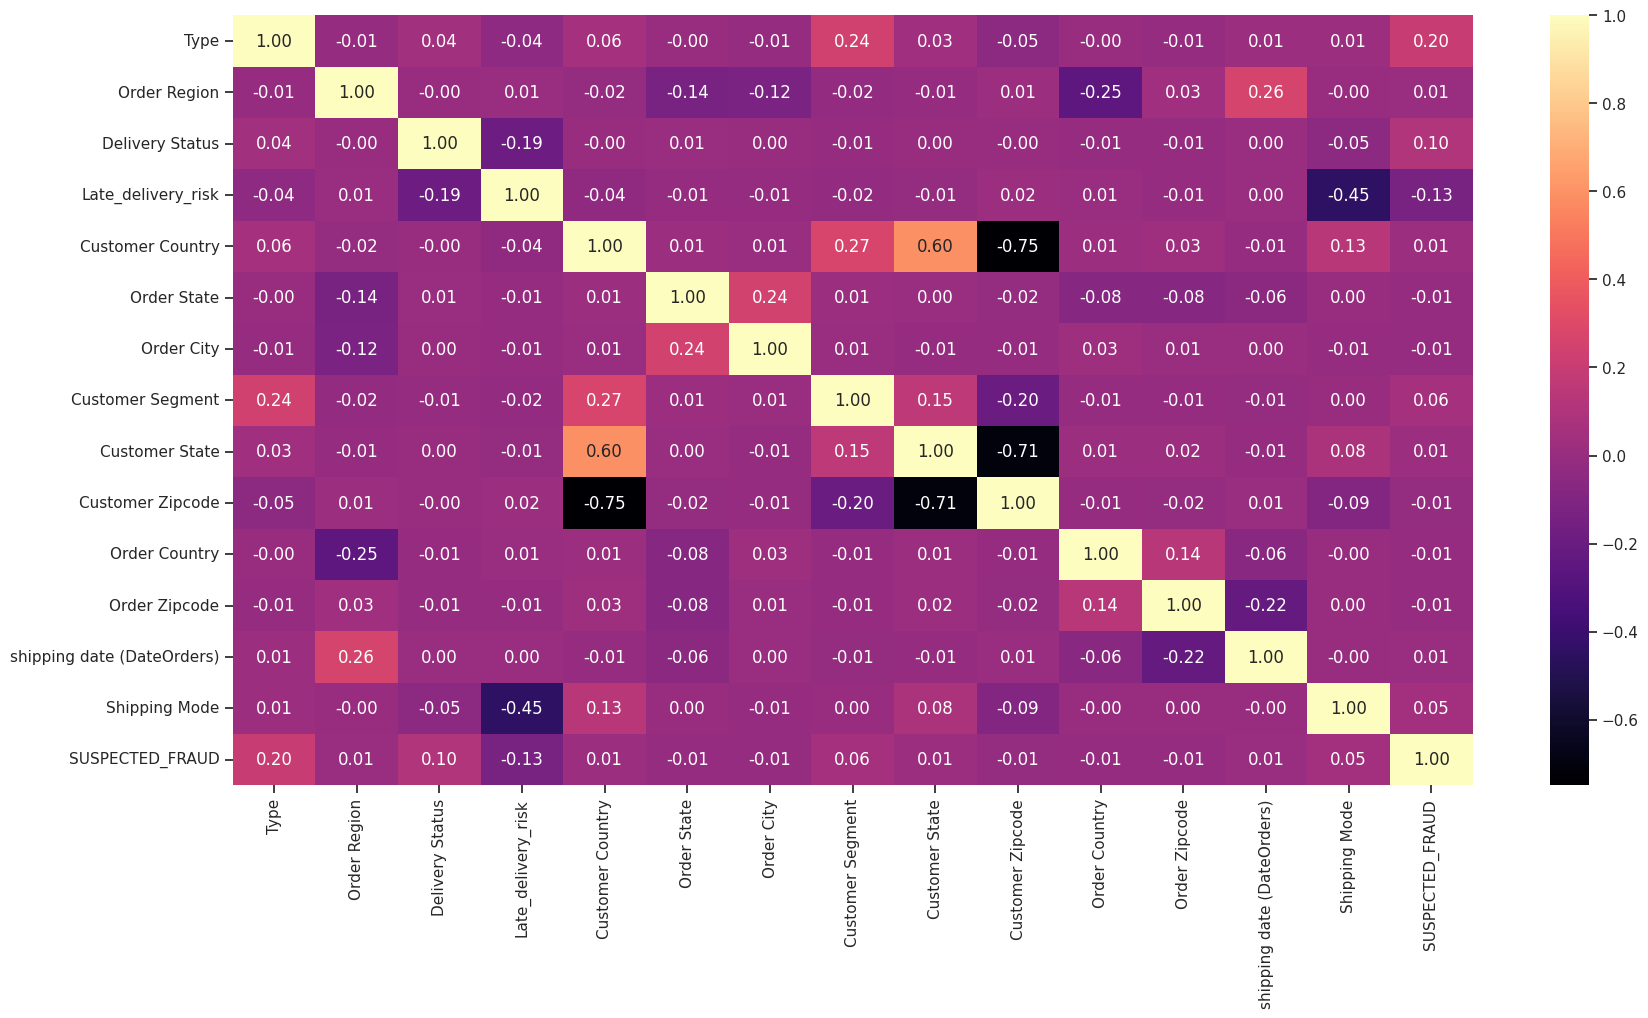

In [52]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(), annot = True, fmt = '.2f', cmap = 'magma')

In [53]:
final_features2=final_features.drop(columns=['Customer State', 'Customer Zipcode'])
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn import metrics
from sklearn.metrics import classification_report

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_features2, target, test_size = 0.2, random_state = 42)

In [55]:
lgr_pipline  = Pipeline([("scaler", StandardScaler()), ("LogisticRegression", LogisticRegression())])
rfc_pipline = Pipeline([("scaler", StandardScaler()), ("RandomForestClassifier", RandomForestClassifier())])
knn_pipline = Pipeline([("scaler", StandardScaler()), ("KNeighborsClassifier", KNeighborsClassifier())])
gnb_pipline = Pipeline([("scaler", StandardScaler()), ("GaussianNB", GaussianNB())])
sgd_pipline = Pipeline([("scaler", StandardScaler()), ("SGDClassifier", SGDClassifier())])
dt_pipline = Pipeline([("scaler", StandardScaler()), ("DecisionTreeClassifier", DecisionTreeClassifier())])
pip_dict1 ={0:'Logistic Regression' , 1:'RandomForestClassifier' , 2: 'KNeighborsClassifier' ,
            3: 'GaussianNB', 4: 'SGDClassifier', 5: 'DecisionTreeClassifier' }
piplines1=[lgr_pipline, rfc_pipline , knn_pipline, gnb_pipline  , sgd_pipline , dt_pipline ]
scores_df = pd.DataFrame(columns = ["Model", "CVScores"])
for i, pipe in enumerate(piplines1):
    score = cross_val_score(pipe, final_features2, target, cv = 10)
    print(pip_dict1[i], ": ", score.mean())

Logistic Regression :  0.9834351253703595
RandomForestClassifier :  0.9871561874869966
KNeighborsClassifier :  0.9825469083456715
GaussianNB :  0.9882129846657819
SGDClassifier :  0.9840590465662983
DecisionTreeClassifier :  0.9886206061877463


In [57]:
grid_params = [
    {"classifier": [RandomForestClassifier()],
    "classifier__n_estimators": [50,100,150,200,250,300],
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_features": ["auto", "sqrt", "log2"],
    },   
]
pipeline_new = Pipeline([("scaler", StandardScaler()), ("classifier", RandomForestClassifier())])

random_search = RandomizedSearchCV(estimator = pipeline_new, param_distributions = grid_params, scoring = 'neg_mean_absolute_error', n_jobs= -1, cv = 8, verbose = 10, random_state = 42)

In [58]:
best_model = random_search.fit(X_train, y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


In [59]:
best_model.best_params_

{'classifier__n_estimators': 100,
 'classifier__max_features': 'log2',
 'classifier__criterion': 'entropy',
 'classifier': RandomForestClassifier(criterion='entropy', max_features='log2')}

In [60]:
pipeline_rf = Pipeline([('scaler', StandardScaler()), 
                           ('Random Forest Calssifer', RandomForestClassifier(criterion='entropy', max_features='sqrt',
                        n_estimators=150))])
model = pipeline_rf.fit(X_train, y_train)

In [61]:
rf_train_predict = pd.DataFrame({'actual' : y_train,
                                 'predicted' : model.predict(X_train)})
rf_train_predict.head()

,actual,predicted
11601,0,0
32950,0,0
37619,0,0
8564,0,0
9856,1,1


In [62]:
rf_test_predict = pd.DataFrame({'actual' : y_test,
                                 'predicted' : model.predict(X_test)})
rf_test_predict.head()

,actual,predicted
16337,0,0
21358,0,0
5216,0,0
17707,0,0
41377,0,0


In [63]:
print('Accuracy Score for train dataset : ' , metrics.accuracy_score(rf_train_predict.actual, rf_train_predict.predicted))
print('Accuracy Score for test dataset : ' , metrics.accuracy_score(rf_test_predict.actual, rf_test_predict.predicted))

Accuracy Score for train dataset :  1.0
Accuracy Score for test dataset :  0.9932781178730045


In [64]:
print('ROC-AUC Score for train dataset : ' , metrics.roc_auc_score(rf_train_predict.actual, rf_train_predict.predicted))
print('ROC-AUC Score for validation dataset : ' , metrics.roc_auc_score(rf_test_predict.actual, rf_test_predict.predicted))

ROC-AUC Score for train dataset :  1.0
ROC-AUC Score for validation dataset :  0.8941595457934278


<Axes: >

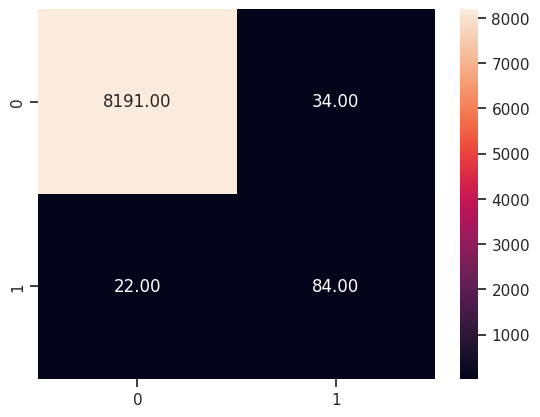

In [69]:
from sklearn.metrics import confusion_matrix
conn_cm_test = metrics.confusion_matrix(rf_test_predict.actual, rf_test_predict.predicted)
sns.heatmap(conn_cm_test, fmt= '.2f', annot=True)

In [70]:
print(metrics.classification_report(rf_test_predict.actual, rf_test_predict.predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8225
           1       0.71      0.79      0.75       106

    accuracy                           0.99      8331
   macro avg       0.85      0.89      0.87      8331
weighted avg       0.99      0.99      0.99      8331



In [71]:
data=df[['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Name', 
             'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Customer Zipcode', 
             'Department Name', 'Market', 'Order City', 'Order Country', 'Customer Id',
             'order date (DateOrders)', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate',
             'Order Item Id', 'Order Item Profit Ratio', 'Sales', 'Order Status',
             'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Zipcode', 
             'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price',
             'Product Status', 'shipping date (DateOrders)', 'Shipping Mode']]
features=data.drop(columns=['Late_delivery_risk'])
target=data['Late_delivery_risk']
features=features.apply(Labelencoder_feature)
features.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Zipcode,Department Name,Market,Order City,Order Country,Customer Id,order date (DateOrders),Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Sales,Order Status,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,1,10814,2022,0,35,66,1,0,35,7,4,3,287,63,11895,2026,95,394,4,41651,140,146,2,2022,10814,15,439,481,95,40,0,63,63,51,0,9573,3
1,3,786,2016,1,35,66,1,0,35,7,4,3,338,62,11627,529,95,455,5,41383,44,146,5,2016,786,13,770,481,95,40,0,63,63,51,0,866,3
2,0,790,2013,3,35,452,0,0,4,941,4,3,338,62,11626,528,95,481,6,41382,44,146,1,2013,790,13,770,481,95,40,0,63,63,51,0,790,3
3,1,7035,2009,0,35,285,0,2,4,720,4,3,2748,7,11625,527,95,544,7,41381,119,146,2,2009,7035,11,764,481,95,40,0,63,63,51,0,703,3
4,2,11874,1996,0,35,66,1,1,35,7,4,3,2748,7,11624,526,95,611,8,41380,156,146,6,1996,11874,11,764,481,95,40,0,63,63,51,0,603,3


In [72]:
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features, target)

In [73]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value'])
f_reg_results.P_Value= f_reg_results.P_Value.astype(float)
f_reg_results=f_reg_results[f_reg_results.P_Value<0.06]
f_reg_results

,Variable,F_Value,P_Value
0,Type,76.958328,0.000
33,Product Price,33.846262,0.000
29,Product Category Id,16.625093,0.000
28,Product Card Id,21.728713,0.000
22,Order Status,53.404747,0.000
16,Order Item Cardprod Id,21.690233,0.000
9,Customer Zipcode,19.749016,0.000
36,Shipping Mode,10417.004081,0.000
6,Customer Country,53.097754,0.000
3,Delivery Status,1504.394823,0.000


In [75]:
f_reg_list=f_reg_results.Variable.values
f_reg_list

df['Delivery Status'].value_counts()

Late delivery        23925
Advance shipping      9317
Shipping on time      7370
Shipping canceled     1041
Name: Delivery Status, dtype: int64

In [76]:
final_features=features[['Type', 'Shipping Mode', 'Order Region',
       'Customer City', 'shipping date (DateOrders)']]
final_data=pd.concat([final_features, target], axis=1)

<Axes: >

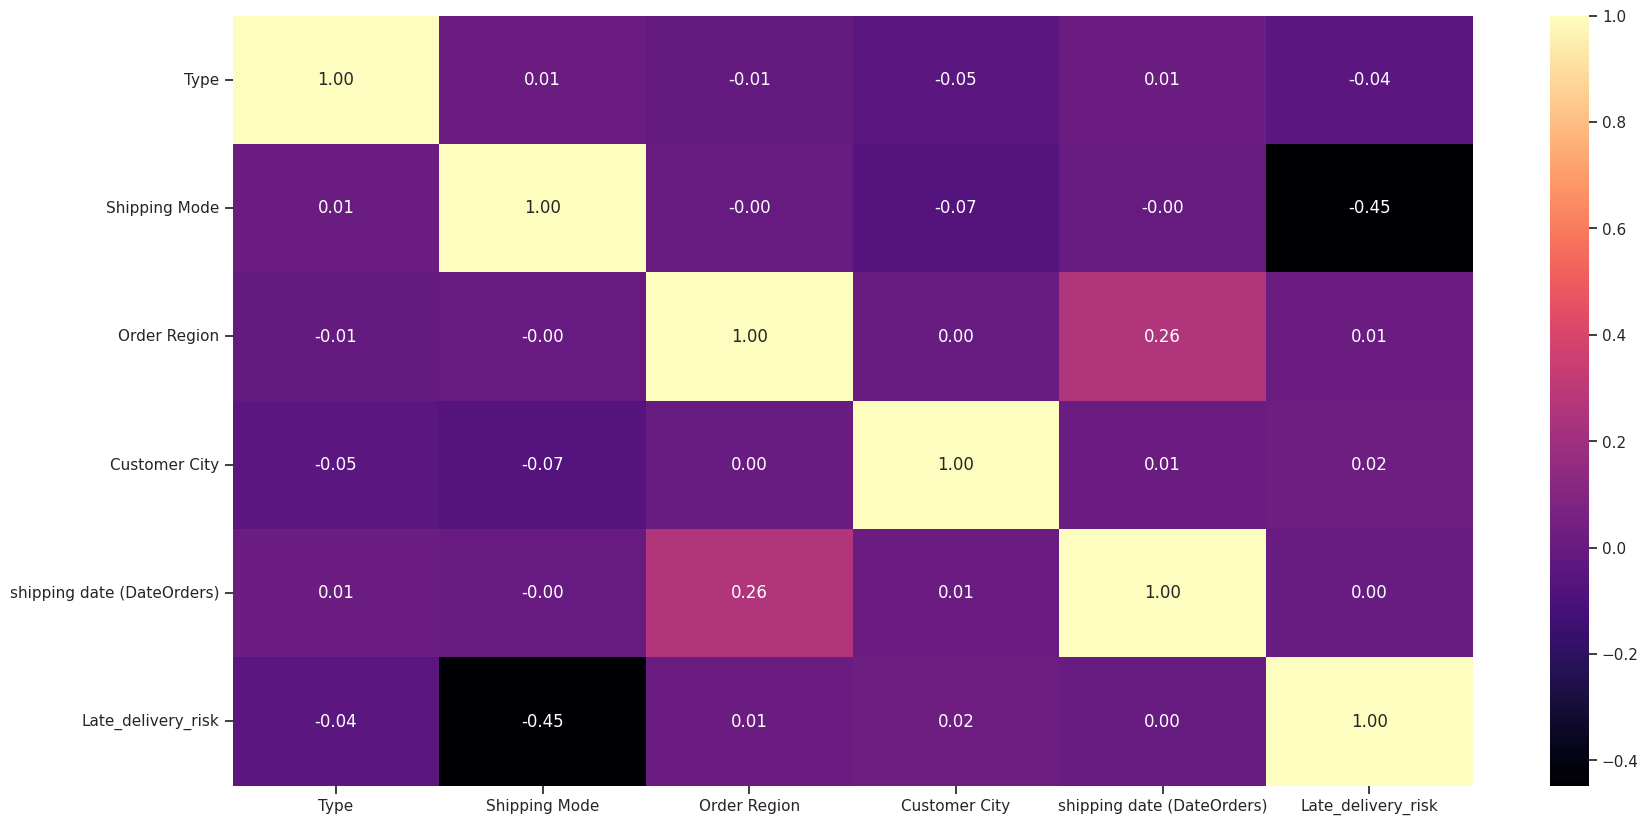

In [77]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(), annot = True, fmt = '.2f', cmap = 'magma')

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_features, target, test_size = 0.2, random_state = 42)

In [79]:
scores_df = pd.DataFrame(columns = ["Model", "CVScores"])
for i, pipe in enumerate(piplines1):
    score = cross_val_score(pipe, final_features, target, cv = 10)
    print(pip_dict1[i], ": ", score.mean())

Logistic Regression :  0.7102749232194079
RandomForestClassifier :  0.7406898409868028
KNeighborsClassifier :  0.6575283305833135
GaussianNB :  0.7055941858260347
SGDClassifier :  0.7102749232194079
DecisionTreeClassifier :  0.7286141801895987


In [80]:
grid_params = [
    {"classifier": [RandomForestClassifier()],
    "classifier__n_estimators": [50,100,150,200,250,300],
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_features": ["auto", "sqrt", "log2"],
    },
    
    {"classifier": [KNeighborsClassifier()],
     "classifier__n_neighbors": [2,3,4,5,6],
     "classifier__algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
     "classifier__leaf_size": [10,20,30,40,50],
    
    },
    
    {"classifier": [DecisionTreeClassifier()],
    "classifier__splitter" :["best", "random"],
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_features": ["auto", "sqrt", "log2"],
    },
    
]

In [81]:
pipeline_new = Pipeline([("scaler", StandardScaler()), ("classifier", RandomForestClassifier())])

random_search = RandomizedSearchCV(estimator = pipeline_new, param_distributions = grid_params, scoring = 'neg_mean_absolute_error', n_jobs= -1, cv = 8, verbose = 10, random_state = 42)

In [82]:
best_model = random_search.fit(X_train, y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


In [83]:
best_model.best_params_

{'classifier__n_estimators': 200,
 'classifier__max_features': 'sqrt',
 'classifier__criterion': 'gini',
 'classifier': RandomForestClassifier(n_estimators=200)}

In [84]:
pipeline_rfl = Pipeline([('scaler', StandardScaler()), 
                           ('andomForestClassifier', RandomForestClassifier(criterion='entropy'))])
model_rfl = pipeline_rfl.fit(X_train, y_train)
rfl_train_predict = pd.DataFrame({'actual' : y_train,
                                 'predicted' : model_rfl.predict(X_train)})
rfl_train_predict.head()

,actual,predicted
11601,1,1
32950,1,1
37619,1,1
8564,1,1
9856,0,0


In [85]:
rfl_test_predict = pd.DataFrame({'actual' : y_test,
                                 'predicted' : model_rfl.predict(X_test)})
rfl_test_predict.head()

,actual,predicted
16337,0,1
21358,0,0
5216,1,1
17707,1,1
41377,0,0


In [86]:
print('Accuracy Score for train dataset : ' , metrics.accuracy_score(rfl_train_predict.actual, rfl_train_predict.predicted))
print('Accuracy Score for test dataset : ' , metrics.accuracy_score(rfl_test_predict.actual, rfl_test_predict.predicted))

Accuracy Score for train dataset :  0.9999399795930617
Accuracy Score for test dataset :  0.8683231304765334


In [87]:
print('ROC-AUC Score for train dataset : ' , metrics.roc_auc_score(rfl_train_predict.actual, rfl_train_predict.predicted))
print('ROC-AUC Score for validation dataset : ' , metrics.roc_auc_score(rfl_test_predict.actual, rfl_test_predict.predicted))

ROC-AUC Score for train dataset :  0.999938593690924
ROC-AUC Score for validation dataset :  0.867765581342808


<Axes: >

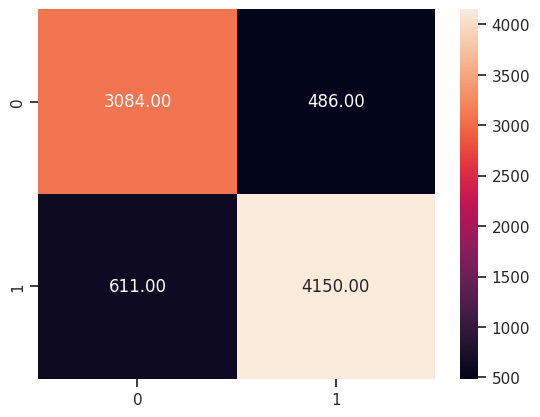

In [88]:
conn_cm_test = metrics.confusion_matrix(rfl_test_predict.actual, rfl_test_predict.predicted)
sns.heatmap(conn_cm_test, fmt= '.2f', annot=True)

In [89]:
print(metrics.classification_report(rfl_test_predict.actual, rfl_test_predict.predicted))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      3570
           1       0.90      0.87      0.88      4761

    accuracy                           0.87      8331
   macro avg       0.86      0.87      0.87      8331
weighted avg       0.87      0.87      0.87      8331



In [90]:
data_sales=df[['Type', 'Benefit per order', 'Sales per customer', 
          'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 
           'Customer Id', 'Customer Segment', 
          'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude',
          'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 
          'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 
          'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 
          'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id',
          'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode']]
       

In [91]:
features=data_sales.drop(columns=['Sales', 'Order Item Quantity', 'Order Item Product Price'])
target=data_sales['Sales']
features=features.apply(Labelencoder_feature)
features.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,1,10814,2022,0,0,35,66,1,11895,0,35,7,4,2307,3532,3,287,63,11895,2026,23114,95,394,4,41651,140,2022,10814,15,439,2,481,95,40,0,63,63,51,0,9573,3
1,3,786,2016,1,1,35,66,1,11627,0,35,7,4,3500,3531,3,338,62,11627,529,22846,95,455,5,41383,44,2016,786,13,770,5,481,95,40,0,63,63,51,0,866,3
2,0,790,2013,3,0,35,452,0,11626,0,4,941,4,6179,189,3,338,62,11626,528,22845,95,481,6,41382,44,2013,790,13,770,1,481,95,40,0,63,63,51,0,790,3
3,1,7035,2009,0,0,35,285,0,11625,2,4,720,4,5658,518,3,2748,7,11625,527,22844,95,544,7,41381,119,2009,7035,11,764,2,481,95,40,0,63,63,51,0,703,3
4,2,11874,1996,0,0,35,66,1,11624,1,35,7,4,2411,3533,3,2748,7,11624,526,22843,95,611,8,41380,156,1996,11874,11,764,6,481,95,40,0,63,63,51,0,603,3


In [94]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [95]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value'])
f_reg_results.P_Value= f_reg_results.P_Value.astype(float)
f_reg_results=f_reg_results[f_reg_results.P_Value<0.06]
f_reg_results

,Variable,F_Value,P_Value
0,Type,76.958328,0.000
33,Product Category Id,33.846262,0.000
29,Order State,16.625093,0.000
28,Order Region,21.728713,0.000
22,Order Item Discount,53.404747,0.000
16,Order City,21.690233,0.000
9,Customer Segment,19.749016,0.000
36,Product Name,10417.004081,0.000
6,Customer City,53.097754,0.000
3,Delivery Status,1504.394823,0.000


In [96]:
f_reg_list=f_reg_results.Variable.values
f_reg_list

array(['Type', 'Product Category Id', 'Order State', 'Order Region',
       'Order Item Discount', 'Order City', 'Customer Segment',
       'Product Name', 'Customer City', 'Delivery Status',
       'Category Name', 'Customer Country', 'Sales per customer',
       'Order Item Discount Rate', 'Order Item Cardprod Id',
       'Order Country', 'Customer State', 'Product Card Id',
       'Order Zipcode', 'Longitude', 'Customer Id', 'Order Customer Id',
       'Benefit per order', 'Order Item Id'], dtype=object)

In [97]:
final_features=features[['Order Id', 'Order Item Discount', 'Order Item Cardprod Id',
       'shipping date (DateOrders)', 'order date (DateOrders)',
       'Order Customer Id', 'Order Profit Per Order', 'Market',
       'Order Region', 'Order State', 'Order Item Total',
       'Department Name', 'Product Card Id', 'Customer Id',
       'Product Category Id', 'Product Image', 'Category Name',
       'Product Name', 'Product Price', 'Sales per customer',
       'Benefit per order', 'Order Zipcode', 'Order Item Id',
       'Order City', 'Customer Segment']]


<Axes: >

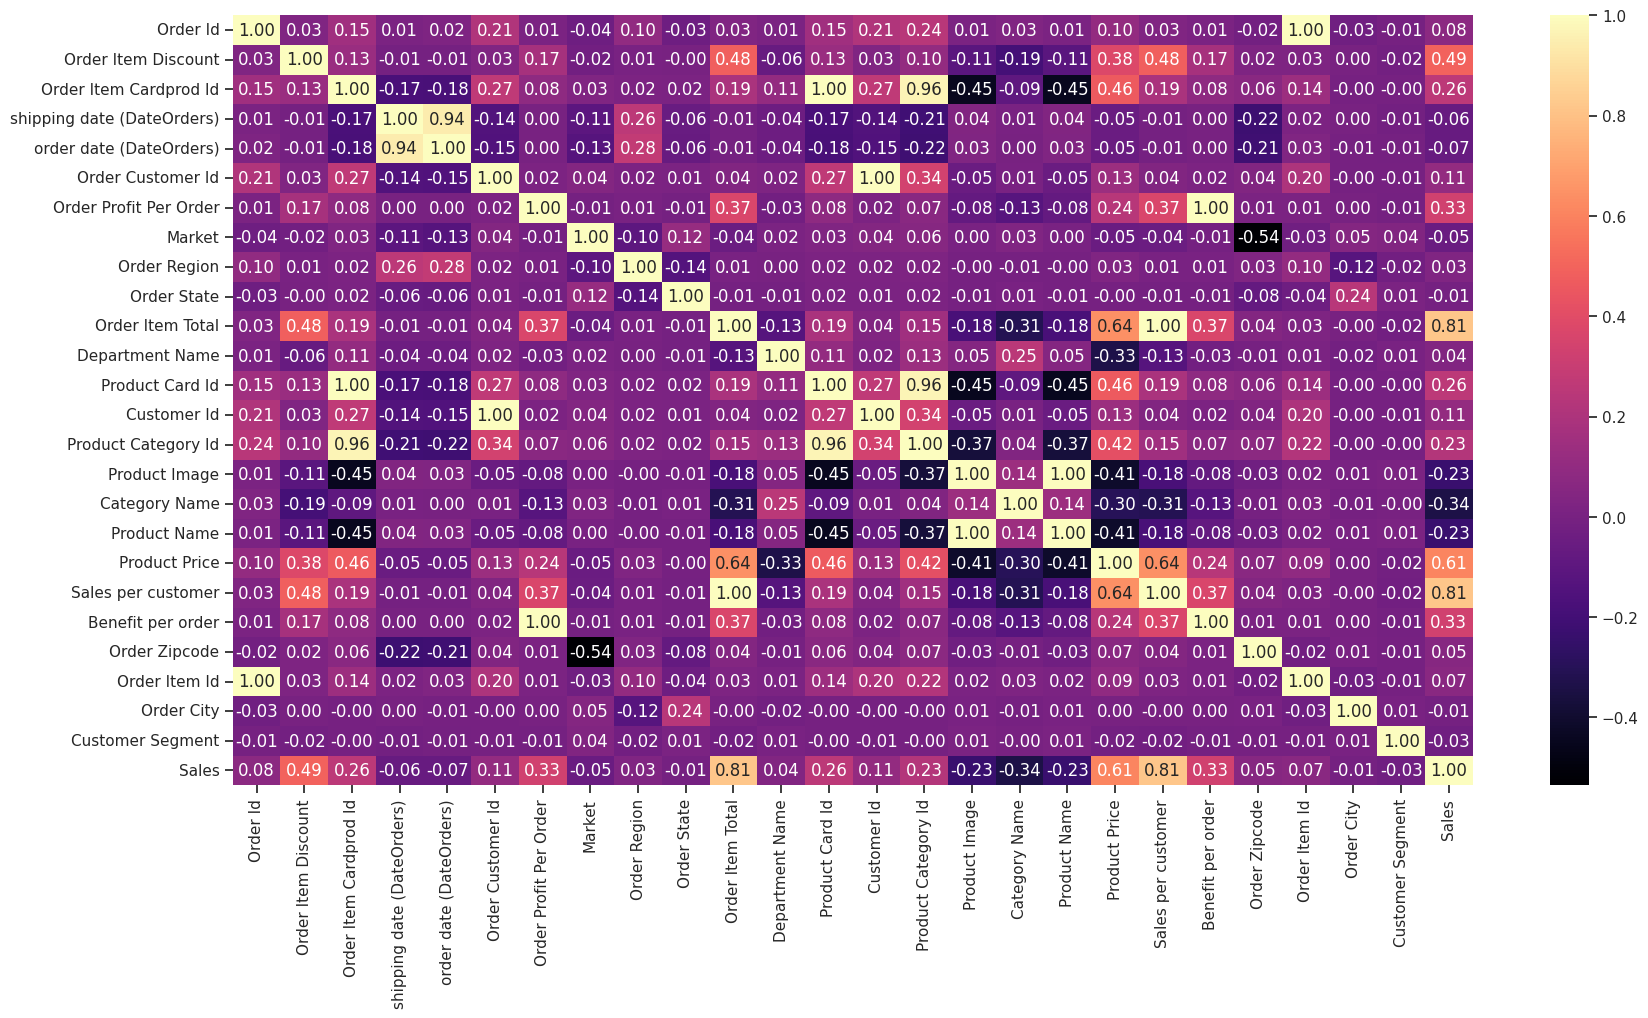

In [98]:
final_data=pd.concat([final_features, target], axis=1)
fig = plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(), annot = True, fmt = '.2f', cmap = 'magma')

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import *
from sklearn.linear_model import LinearRegression, RANSACRegressor, Lasso, Ridge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_features, target, test_size = 0.3, random_state = 42)

In [101]:
lr_pipeline = Pipeline([("scaler", StandardScaler()), ("linear_regression", LinearRegression())])
ridge_pipeline = Pipeline([("scaler", StandardScaler()), ("ridge_regressor", Ridge(random_state = 42))])
lasso_pipeline = Pipeline([("scaler", StandardScaler()), ("lasso_regressor", Lasso(random_state = 42))])
random_forest_pipeline = Pipeline([("scaler", StandardScaler()), ("randomforest_regression", RandomForestRegressor(random_state = 42))])
xgboost_pipeline = Pipeline([("scaler", StandardScaler()), ("xgboost_regression", XGBRegressor())])
knn_pipeline = Pipeline([("scaler", StandardScaler()), ("knn_regression", KNeighborsRegressor())])

In [102]:
pipelines = [lr_pipeline, ridge_pipeline, lasso_pipeline,
            random_forest_pipeline, xgboost_pipeline, knn_pipeline]

In [103]:
pipe_dict = {0: "Linear Regression", 1: "Ridge",
            2: "Lasso", 3: "RandomForest", 4: "XGBoost",
            5: "Decision Tree", 6: "KNN"}

In [104]:
scores_df = pd.DataFrame(columns = ["Model", "CVScores"])
for i, pipe in enumerate(pipelines):
    score = cross_val_score(pipe, final_features,target, cv = 5)
    print(pipe_dict[i], ": ", score.mean())

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 722, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 723, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_regression.py", line 911, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/u

Linear Regression :  nan
Ridge :  nan


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 722, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 723, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_regression.py", line 911, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/u

Lasso :  nan


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 722, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 723, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_regression.py", line 911, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/u

RandomForest :  nan


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 722, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 723, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_regression.py", line 911, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/u

XGBoost :  nan
Decision Tree :  nan


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 722, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 723, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_regression.py", line 911, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/u

In [105]:
grid_params = [
    
{"classifier": [XGBRegressor()],
     "classifier__n_estimators": [100,150,200,250,300],
     
}
    
]

In [106]:
pipeline_new = Pipeline([("scaler", StandardScaler()), ("classifier", XGBRegressor())])
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [107]:
random_search = RandomizedSearchCV(estimator = pipeline_new, param_distributions = grid_params, scoring = 'neg_mean_absolute_error', n_jobs= -1, cv = 8, verbose = 10, random_state = 42)

In [113]:
best_model.best_params_

{'classifier__n_estimators': 200,
 'classifier__max_features': 'sqrt',
 'classifier__criterion': 'gini',
 'classifier': RandomForestClassifier(n_estimators=200)}